<a href="https://colab.research.google.com/github/bmustafa225/DS-Portfolio/blob/main/Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

from_file='/content/Data.zip'
to_file='/content/Books'
with zipfile.ZipFile(from_file,'r') as zip_ref:
  zip_ref.extractall(to_file)

In [2]:
import pandas as pd
import numpy as np

books_df=pd.read_excel('/content/Books/Participants_Data/Data_Train.xlsx')
books_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [3]:
books_df.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


In [4]:
books_df.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [5]:
books_df.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [6]:
def rev_convert(x):
  l=x.split()
  y=float(l[0])/float(l[3])
  return y

def extract_rat(x):
  x=x.replace(',','')
  l=x.split()
  y=int(l[0])
  return y

In [7]:
books_df['Reviews']=books_df['Reviews'].apply(rev_convert)
books_df['Ratings']=books_df['Ratings'].apply(extract_rat)

In [8]:
books_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",0.80,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",0.78,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",0.96,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",0.82,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1.00,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


Applying Laplaces rule of succession to make adjustment to Ratings and standardize results. This rule looks at the number of successes (s) in n trials and failures (n-s) and adjusts the ratings to \begin{equation} ratings=\frac{(s+1)}{(n+2)} \end{equation}

adding 1 extra failure and 1 extra success to the n trials. This is a very conservative estimate and might be a source of error in the final estimate.



---





In [9]:
k=(books_df.Reviews*books_df.Ratings)
k=(k+1)/(books_df.Ratings+2)
books_df['adjust_ratings']=k

In [10]:
books_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,adjust_ratings
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",0.80,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0.740000
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",0.78,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.745000
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",0.96,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,0.845000
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",0.82,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0.777333
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1.00,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,0.666667


In [11]:
copy_df=books_df.copy()

copy_df.drop(['Reviews','Ratings'],axis=1,inplace=True)
copy_df.head()

,Title,Author,Edition,Synopsis,Genre,BookCategory,Price,adjust_ratings
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0.740000
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.745000
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982","""During the time men live without a common Pow...",International Relations,Humour,299.00,0.845000
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0.777333
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006","For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,0.666667


<Axes: xlabel='BookCategory'>

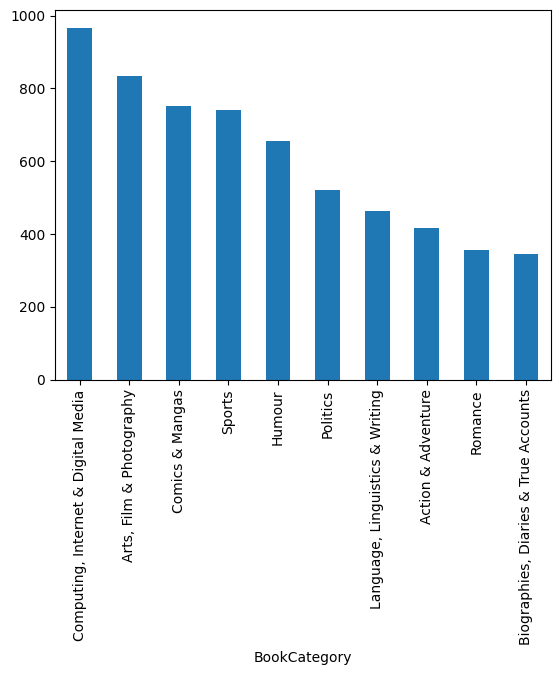

In [12]:
df=copy_df.groupby(['BookCategory'])['Price'].mean().nlargest(10)
df.plot(kind='bar')

In [13]:
import re

copy_df['Edition']=copy_df['Edition'].str.replace(',','')
style=copy_df.Edition.apply(lambda x: re.split('(\d+)',x)[0])
date=copy_df['Edition'].apply(lambda x: ''.join(re.split('(\d+)',x)[1:]))

# New section

In [14]:
copy_df['Style']=style
copy_df['Date']=pd.to_datetime(date)

In [15]:
copy_df.head()

,Title,Author,Edition,Synopsis,Genre,BookCategory,Price,adjust_ratings,Style,Date
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback– 10 Mar 2016,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0.740000,Paperback–,2016-03-10
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback– 7 Nov 2012,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.745000,Paperback–,2012-11-07
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback– 25 Feb 1982,"""During the time men live without a common Pow...",International Relations,Humour,299.00,0.845000,Paperback–,1982-02-25
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback– 5 Oct 2017,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0.777333,Paperback–,2017-10-05
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover– 10 Oct 2006,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,0.666667,Hardcover–,2006-10-10


In [16]:
copy_df.drop('Edition',axis=1,inplace=True)

In [17]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
import re

copy_df.Synopsis=copy_df['Synopsis'].replace('\n',' ')
stop=stopwords.words('english')
copy_df.Synopsis=copy_df.Synopsis.apply(lambda x: x.lower())
All_punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
copy_df.Synopsis=copy_df.Synopsis.apply(lambda x:re.sub(r"""
               [,.;@#?!&$]+  # Accept one or more copies of punctuation
               \ *           # plus zero or more copies of a space,
               """,
               " ",          # and replace it with a single space
               x, flags=re.VERBOSE))
copy_df.Synopsis=copy_df.Synopsis.apply(lambda x: re.sub("[^a-zA-Z]"," ",x))
copy_df['CleanSynopsis']=copy_df['Synopsis'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [20]:
copy_df.CleanSynopsis[0]

'hunters return third brilliant novel sunday times top ten bestselling author chris kuzneski whose writing james patterson says raw power team hunting marco polo hidden treasure tail hunters seek find travels marco polo known throughout world story complete greatest adventure yet discovered guided journal believed dictated polo hunters set search final legacy mythical treasure gathered polo lifetime exploration every ancient clue brings closer truth new step puts increasing danger explosive action killer characters classic kuzneski'

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cvec=CountVectorizer()
tfidf=TfidfVectorizer(norm=None,max_features=10000)
c=cvec.fit_transform(copy_df.CleanSynopsis)
t=tfidf.fit_transform(copy_df.CleanSynopsis)


In [22]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer


copy_df['SentimentPolarity']=copy_df['CleanSynopsis'].apply(lambda x: TextBlob(x).sentiment.polarity)
copy_df['SentimentSubjectivity']=copy_df['CleanSynopsis'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

#copy_df['PositiveAdj']=copy_df['Synopsis'].apply(lambda x: word for (word,tag) in TextBlob(x).tags if tag == "JJ")

In [23]:
copy_df['WordCount']=copy_df['Synopsis'].apply(lambda x: len(x.split()))
copy_df['UniqueWords']=copy_df['Synopsis'].apply(lambda x: len(set(x.split())))



---



---



The following code is included to show the attempt at a detailed breakdown in sentiment analysis, aiming to look at the split of positive to negative sentiments. Unfortunately, the code runtime is too long (over 1 hour) with no results. A small sample is shown to illustrate the intent, but not included in the final analysis!

In [ ]:
blob=copy_df['CleanSynopsis'][0:50].apply(lambda x: TextBlob(x,analyzer= NaiveBayesAnalyzer()).sentiment)

p_pos=[p for (sent,p,n) in blob]
p_neg=[n for (sent,p,n) in blob]

In [24]:
print(p_pos)
p_neg

NameError: ignored



---



---



In [24]:
copy_df.drop('Synopsis',inplace=True,axis=1)

In [25]:
copy_df

,Title,Author,Genre,BookCategory,Price,adjust_ratings,Style,Date,CleanSynopsis,SentimentPolarity,SentimentSubjectivity,WordCount,UniqueWords
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Action & Adventure (Books),Action & Adventure,220.00,0.740000,Paperback–,2016-03-10,hunters return third brilliant novel sunday ti...,0.208800,0.451340,134,99
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.745000,Paperback–,2012-11-07,layered portrait troubled genius art merely th...,0.147348,0.491162,192,118
2,Leviathan (Penguin Classics),Thomas Hobbes,International Relations,Humour,299.00,0.845000,Paperback–,1982-02-25,time men live without common power keep awe co...,0.150480,0.438485,261,173
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0.777333,Paperback–,2017-10-05,handful grain found pocket murdered businessma...,0.100000,0.375000,76,59
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Photography Textbooks,"Arts, Film & Photography",965.62,0.666667,Hardcover–,2006-10-10,seven decades life thrilling world unrivalled ...,0.288889,0.786111,107,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,Anthropology (Books),Humour,322.00,0.750000,Paperback–,2018-08-08,f cking brilliant sarah knight funny mark wats...,0.067857,0.491071,224,162
6233,The Chemist,Stephenie Meyer,Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,0.630909,Paperback–,2016-11-21,gripping page turner ex agent run former emplo...,0.072585,0.459659,254,152
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,Romance (Books),Romance,399.00,0.656000,Paperback–,2006-06-08,refreshing radiant love story read year lisa k...,0.366225,0.593782,221,156
6235,Frostfire (Kanin Chronicles),Amanda Hocking,Action & Adventure (Books),Action & Adventure,319.00,0.633333,Paperback–,2015-01-15,frostfire amanda hocking stunning first instal...,0.146429,0.522619,165,111


In [26]:
tfidf.get_feature_names_out()

array(['aadhaar', 'aap', 'aatish', ..., 'zones', 'zoo', 'zynpagua'],
      dtype=object)

In [27]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=01369a677e2e8042150fe5f0e1016e228d83d74f3c3d644697e0dd254d675602
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling cha

In [28]:
import googletrans
from googletrans import Translator

#lanuage=copy_df['Synopsis'].apply(lambda x: Translator.detect(str(x)))
trans=Translator()
lang=list(copy_df['CleanSynopsis'].apply(lambda x: str(trans.detect(x).lang)))

In [29]:
copy_df['Language']=lang
copy_df

,Title,Author,Genre,BookCategory,Price,adjust_ratings,Style,Date,CleanSynopsis,SentimentPolarity,SentimentSubjectivity,WordCount,UniqueWords,Language
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Action & Adventure (Books),Action & Adventure,220.00,0.740000,Paperback–,2016-03-10,hunters return third brilliant novel sunday ti...,0.208800,0.451340,134,99,en
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.745000,Paperback–,2012-11-07,layered portrait troubled genius art merely th...,0.147348,0.491162,192,118,en
2,Leviathan (Penguin Classics),Thomas Hobbes,International Relations,Humour,299.00,0.845000,Paperback–,1982-02-25,time men live without common power keep awe co...,0.150480,0.438485,261,173,en
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0.777333,Paperback–,2017-10-05,handful grain found pocket murdered businessma...,0.100000,0.375000,76,59,en
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Photography Textbooks,"Arts, Film & Photography",965.62,0.666667,Hardcover–,2006-10-10,seven decades life thrilling world unrivalled ...,0.288889,0.786111,107,75,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,Anthropology (Books),Humour,322.00,0.750000,Paperback–,2018-08-08,f cking brilliant sarah knight funny mark wats...,0.067857,0.491071,224,162,en
6233,The Chemist,Stephenie Meyer,Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,0.630909,Paperback–,2016-11-21,gripping page turner ex agent run former emplo...,0.072585,0.459659,254,152,en
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,Romance (Books),Romance,399.00,0.656000,Paperback–,2006-06-08,refreshing radiant love story read year lisa k...,0.366225,0.593782,221,156,en
6235,Frostfire (Kanin Chronicles),Amanda Hocking,Action & Adventure (Books),Action & Adventure,319.00,0.633333,Paperback–,2015-01-15,frostfire amanda hocking stunning first instal...,0.146429,0.522619,165,111,en


In [30]:
copy_df.groupby('Language')['Price'].count()

Language
['en', 'om']       1
['hi', 'gu']       1
de                 1
en              6231
fr                 2
kri                1
Name: Price, dtype: int64

In [31]:
copy_df['Year']=copy_df.Date.dt.year
month=copy_df.Date.dt.month
doy=copy_df.Date.dt.day_of_year
week=copy_df.Date.dt.week

<ipython-input-31-3ec97c6778b8>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week=copy_df.Date.dt.week


We regularize the columns of Months, Day of Year(DOY) and Week to include the cyclical nature of these variables for the machine to learn.

In [32]:
copy_df['sin_month']= np.sin((month-1)*(2.*np.pi/12))
copy_df['cos_month'] = np.cos((month-1)*(2.*np.pi/12))
copy_df['sin_DOY']= np.sin((doy-1)*(2.*np.pi/365))
copy_df['cos_DOY'] = np.cos((doy-1)*(2.*np.pi/365))
copy_df['sin_week']= np.sin((week-1)*(2.*np.pi/52))
copy_df['cos_week'] = np.cos((week-1)*(2.*np.pi/52))

In [33]:
copy_df

,Title,Author,Genre,BookCategory,Price,adjust_ratings,Style,Date,CleanSynopsis,SentimentPolarity,...,WordCount,UniqueWords,Language,Year,sin_month,cos_month,sin_DOY,cos_DOY,sin_week,cos_week
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Action & Adventure (Books),Action & Adventure,220.00,0.740000,Paperback–,2016-03-10,hunters return third brilliant novel sunday ti...,0.208800,...,134,99,en,2016.0,0.866025,5.000000e-01,0.927542,0.373720,0.885456,4.647232e-01
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.745000,Paperback–,2012-11-07,layered portrait troubled genius art merely th...,0.147348,...,192,118,en,2012.0,-0.866025,5.000000e-01,-0.801361,0.598181,-0.822984,5.680647e-01
2,Leviathan (Penguin Classics),Thomas Hobbes,International Relations,Humour,299.00,0.845000,Paperback–,1982-02-25,time men live without common power keep awe co...,0.150480,...,261,173,en,1982.0,0.500000,8.660254e-01,0.811539,0.584298,0.748511,6.631227e-01
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0.777333,Paperback–,2017-10-05,handful grain found pocket murdered businessma...,0.100000,...,76,59,en,2017.0,-1.000000,-1.836970e-16,-0.998435,0.055917,-1.000000,-1.836970e-16
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Photography Textbooks,"Arts, Film & Photography",965.62,0.666667,Hardcover–,2006-10-10,seven decades life thrilling world unrivalled ...,0.288889,...,107,75,en,2006.0,-1.000000,-1.836970e-16,-0.989932,0.141540,-0.992709,1.205367e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,Anthropology (Books),Humour,322.00,0.750000,Paperback–,2018-08-08,f cking brilliant sarah knight funny mark wats...,0.067857,...,224,162,en,2018.0,-0.500000,-8.660254e-01,-0.587785,-0.809017,-0.568065,-8.229839e-01
6233,The Chemist,Stephenie Meyer,Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,0.630909,Paperback–,2016-11-21,gripping page turner ex agent run former emplo...,0.072585,...,254,152,en,2016.0,-0.866025,5.000000e-01,-0.635432,0.772157,-0.663123,7.485107e-01
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,Romance (Books),Romance,399.00,0.656000,Paperback–,2006-06-08,refreshing radiant love story read year lisa k...,0.366225,...,221,156,en,2006.0,0.500000,-8.660254e-01,0.409356,-0.912375,0.464723,-8.854560e-01
6235,Frostfire (Kanin Chronicles),Amanda Hocking,Action & Adventure (Books),Action & Adventure,319.00,0.633333,Paperback–,2015-01-15,frostfire amanda hocking stunning first instal...,0.146429,...,165,111,en,2015.0,0.000000,1.000000e+00,0.238673,0.971100,0.239316,9.709418e-01


In [34]:
auth_sales=copy_df.groupby('Author')['Title'].count().nlargest(50)
book_mean=copy_df.loc[copy_df['Author'].isin(auth_sales.index)].groupby('Author')['Price'].mean()

In [35]:
auth_sales_price=pd.concat([auth_sales,book_mean],axis=1)
auth_sales_price

,Title,Price
Author,,
Agatha Christie,69,241.170870
Ladybird,49,102.796531
DK,48,692.149792
Albert Uderzo,34,388.147059
Herge,34,451.389706
James Patterson,32,245.093750
Bill Watterson,30,539.175000
John Grisham,30,225.333333
P.G. Wodehouse,29,458.758621


In [36]:
sp_df=pd.DataFrame(t.toarray(),columns=tfidf.get_feature_names_out())
sp_df

,aadhaar,aap,aatish,abandon,abandoned,abap,abbott,abbreviations,abdominals,abducted,...,zen,zero,zetter,zlatan,zoe,zog,zone,zones,zoo,zynpagua
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6233,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6234,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6235,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X=pd.concat([copy_df,sp_df],axis=1)


In [38]:
y=copy_df.Price
X.drop(['Title','Author','Price','CleanSynopsis','Date'],inplace=True,axis=1)

In [39]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder,StandardScaler

ohe=OneHotEncoder()
ss=StandardScaler()
kfold=KFold(n_splits=5,shuffle=True)

In [40]:
cat_var=X.select_dtypes('object').columns
num_var=['WordCount','UniqueWords']

In [41]:
cat_col=ohe.fit_transform(X[cat_var])
num_col=ss.fit_transform(X[num_var])

In [42]:
cat_df=pd.DataFrame(cat_col.toarray(),columns=ohe.get_feature_names_out())
num_df=pd.DataFrame(num_col,columns=ss.get_feature_names_out())

In [43]:
drop_col=list(cat_var)+list(num_var)
X.drop(drop_col,axis=1,inplace=True)

In [44]:
X=pd.concat([cat_df,num_df,X],axis=1)

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

LR=LinearRegression()
RFR=RandomForestRegressor()

In [46]:
LR_score=cross_val_score(LR,X,y,cv=kfold,scoring='neg_mean_squared_error')
LR_score

ValueError: ignored

It seems that the dataframe has several Null values that need to be addressed for us to continue with the process, the following determines which columns we need to look into and how many null values are present in each.

In [47]:
for col in X.columns:
  if X[str(col)].isnull().sum()>0:
    print(col,X[str(col)].isnull().sum())
    k=X[X[str(col)].isnull()].index.tolist()
    print(k)

Year 21
[169, 235, 582, 972, 1233, 1558, 1605, 1631, 1643, 1769, 2101, 2229, 2660, 2779, 3511, 3875, 3960, 4036, 4403, 5117, 5860]
sin_month 21
[169, 235, 582, 972, 1233, 1558, 1605, 1631, 1643, 1769, 2101, 2229, 2660, 2779, 3511, 3875, 3960, 4036, 4403, 5117, 5860]
cos_month 21
[169, 235, 582, 972, 1233, 1558, 1605, 1631, 1643, 1769, 2101, 2229, 2660, 2779, 3511, 3875, 3960, 4036, 4403, 5117, 5860]
sin_DOY 21
[169, 235, 582, 972, 1233, 1558, 1605, 1631, 1643, 1769, 2101, 2229, 2660, 2779, 3511, 3875, 3960, 4036, 4403, 5117, 5860]
cos_DOY 21
[169, 235, 582, 972, 1233, 1558, 1605, 1631, 1643, 1769, 2101, 2229, 2660, 2779, 3511, 3875, 3960, 4036, 4403, 5117, 5860]
sin_week 21
[169, 235, 582, 972, 1233, 1558, 1605, 1631, 1643, 1769, 2101, 2229, 2660, 2779, 3511, 3875, 3960, 4036, 4403, 5117, 5860]
cos_week 21
[169, 235, 582, 972, 1233, 1558, 1605, 1631, 1643, 1769, 2101, 2229, 2660, 2779, 3511, 3875, 3960, 4036, 4403, 5117, 5860]


Since the index are the same for all of the null values totaling to 21 rows in total, removing them would be preferable than trying to impute the value and create a bias in the data.

In [48]:
X.drop(k,inplace=True,axis=0)

In [49]:
X[X[str(col)].isnull()].index.tolist()

[]

In [50]:
y.drop(k,inplace=True,axis=0)

In [51]:
LR_score=cross_val_score(LR,X[0:int(len(y)/2)],y[0:int(len(y)/2)],cv=kfold,scoring='neg_mean_squared_error')
LR_score

array([-1.78459070e+28, -1.45825559e+28, -2.24281753e+28, -2.63394784e+28,
       -1.08938792e+28])

In [52]:
RFR_score=cross_val_score(RFR,X[0:int(len(y)/2)],y[0:int(len(y)/2)],cv=kfold,scoring='neg_mean_squared_error')
RFR_score

array([-635783.18478958, -458537.20564492, -722726.41557917,
       -193630.7728098 , -175844.77920559])

So we can see that the RandomForestRegressor performs better than the LinearRegression model, however, the scores are too high to be considered as viable models; this is most likely due to the fact that the Regression models  are highly sensitive to ouliers. We can take a look at the features to see if we can trim it down to help our models perform better.

In [53]:
books_df.Price.describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

In [54]:
import plotly.express as px

px.box(books_df,y='Price')

In [55]:
px.histogram(books_df,x='Price')

In [70]:
q1 = books_df.Price.quantile(0.25)
q3 = books_df.Price.quantile(0.75)
iqr = q3 - q1
upper=q3 + 1.5 * iqr
lower=q1 - 1.5 * iqr
J=books_df.copy()
J.drop(k,inplace=True,axis=0)
J = J[(J.Price > lower) & (J.Price < (upper))]

In [71]:
px.box(J,y='Price')

In [76]:
J

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,adjust_ratings
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",0.80,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,0.740000
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",0.78,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,0.745000
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",0.96,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00,0.845000
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",0.82,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,0.777333
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",1.00,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,0.666667
...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",1.00,2,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,322.00,0.750000
6233,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",0.66,9,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",421.00,0.630909
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",0.76,3,'The most refreshing and radiant love story yo...,Romance (Books),Romance,399.00,0.656000
6235,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",0.70,4,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,319.00,0.633333


In [72]:
Jind=J.index.tolist()
Jind

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 146,
 148,
 150,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 205

In [75]:
X2=X.loc[Jind]
X2

,Genre_API & Operating Environments,Genre_Action & Adventure (Books),Genre_Active Outdoor Pursuits (Books),Genre_Aeronautical Engineering,Genre_Aesthetics,Genre_Agriculture & Farming (Books),Genre_Air Sports (Books),Genre_Algebra & Trigonometry,Genre_Algorithms,Genre_Alphabet Reference,...,zen,zero,zetter,zlatan,zoe,zog,zone,zones,zoo,zynpagua
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6235,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
y2=y.loc[Jind]

In [79]:
LR_score=cross_val_score(LR,X2,y2,cv=kfold,scoring='neg_mean_squared_error')
LR_score

array([-1.56872117e+28, -8.76252813e+27, -5.63327162e+26, -1.74403958e+26,
       -1.89731852e+27])

In [80]:
RFR_score=cross_val_score(RFR,X2,y2,cv=kfold,scoring='neg_mean_squared_error')
RFR_score

array([-34089.63056338, -31383.75438165, -33186.80982313, -32534.03538501,
       -34227.88416981])

So, removing the outliers has created better scores for the regressors. They seem more viable than the previous models but they are still far from being perfect. Given that the data is wide and sparse, using L2 regularization will allow for the model to deal with the high-dimensionality of the data.



In [84]:
from sklearn.linear_model import Ridge

RGE=Ridge(alpha=0.01)
RGE_score=cross_val_score(RGE,X2,y2,cv=kfold,scoring='neg_mean_squared_error')
RGE_score

array([-102646.58514646, -121764.91402148, -124471.69313894,
        -99383.14133953, -139306.16965036])

array([-130521.55015014, -131332.78743409, -269752.97327652,
       -252141.11462526, -132595.41023161])